# 2. 컨볼루션 신경망(CNN) 사용하기
- 컨볼루션(합성곱) 신경망은 입력된 이미지에서 다시 한번 특징을 추출하기 위해 마스크(필터, 윈도 또는 커널이라고함)를 도입하는 것
- 컨볼루션을 만들면 입력 데이터로부터 정교한 특징을 얻을 수 있다.
- 마스크를 여러개 만들 경우 여러 개의 컨볼루션이 만들어진다.
  
  
- model.add(Conv2D(32, kernel_size=(3,3), input_shape(28, 28, 1), activation='relu'))
- 케라스에서 컨볼루션을 추가하는 함수는 Conv2D, 32개의 마스크를 적용
- kernel_size : 마스크의 크기를 정한다(행, 열), 3 x 3 크기의 마스크를 사용하게끔 한다.
- input_shape : Dense 층과 마찬가지로 맨 처음 층에는 입력되는 값을 알려줘야한다. (행, 열, 색상(3) 또는 흑백(1))
- activation : 활성화 함수를 정의


## 맥스 풀링
- 앞서 구현한 컨볼루션 층을 통해 이미지의 특징을 추출함
- 하지만, 그 결과가 여전히 크고 복잡하면 이를 다시 축소해야함.
- 이 과정을 풀링(pooling) 또는 서브 샘플링(sub sampling)이라고 한다.
- 풀링 기법 중 가장 많이 사용되는 방법이 맥스 풀링(max pooling)이다.
- 맥스 풀링은 정해진 구역 안에서 가장 큰값만 다음 층으로 넘기고 나머지는 버린다.
- 맥스 풀링은 MaxPooling2D()함수를 사용한다.
- model.add(MaxPooling2D(pool_size=2)
- 여기서 pool_size = 2는 풀링 창의 크기를 정하는 것으로, 2로 정하면 전체 크기가 절반으로 줄어든다.


## 드롭아웃(Dropout)
- 드롭아웃은 과적합을 피해가는 방법 중 효과가 큰 방법
- 드롭아웃은 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것이다.
- 랜덤하게 노드를 끔으로써 과적합을 방지할 수 있다.
- 25%의 노드를 끄려먼 다음과 같이 코드를 작성하면 된다.
- model.add(Dropout(0.25))


## 플래튼(Flatten)
- 위에서 진행한 컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열로 다룬다.
- 따라서 기존 모델층에 추가하기 위해서는 이를 1차원으로 변경해야 하는데, 이때 사용하는 함수가 플래튼 함수다.
- model.add(Flatten())


## 패딩(Padding)
- 패딩(Padding)은 합성곱 연산을 수행하기 전, 입력데이터 주변을 특정값으로 채워 늘리는 것을 말한다. 패딩(Padding)은 주로 출력데이터의 공간적(Spatial)크기를 조절하기 위해 사용한다. 패딩을 할때, 채울 값은 hyperparameter로 어떤 값을 채울지 결정할 수 있다. 주로 zero-padding을 사용한다.

- 패딩을 사용하는 이유는 패딩을 사용하지 않을 경우, 데이터의 Spatial 크기는 Conv Layer를 지날 때 마다 작아지게 되므로, 가장자리의 정보들이 사라지는 문제가 발생하기 때문에 패딩을 사용한다.

출처: https://excelsior-cjh.tistory.com/79 [EXCELSIOR]


## 스트라이드(Stride)
- 스트라이드는 입력데이터에 필터를 적용할 때 이동할 간격을 조절하는 것, 즉 필터가 이동할 간격을 말한다. 스트라이드 또한 출력 데이터의 크기를 조절하기 위해 사용한다. 스트라이드(Stride)는 보통 1과 같이 작은 값이 더 잘 작동하며, Stride가 1일 경우 입력 데이터의 spatial 크기는 pooling 계층에서만 조절하게 할 수 있다.  

출처: https://excelsior-cjh.tistory.com/79 [EXCELSIOR]


## 출력크기 계산
- 패딩과 스트라이드를 적용하고, 입력데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식은 아래 [식 1]과 같다.  

출처: https://excelsior-cjh.tistory.com/79 [EXCELSIOR]

In [179]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [180]:
# seed값 설정
seed = 0 
np.random.seed(seed)
tf.set_random_seed(seed)

In [181]:
# 데이터 불러오기
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()

# CNN에 적용하기 위한 2차원 형태.
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test  = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

# 원-핫 인코딩
Y_train = np_utils.to_categorical(Y_train)
Y_test  = np_utils.to_categorical(Y_test)

In [182]:
# 컨볼루션 신경망(CNN)의 설정

model = Sequential()
# 컨볼루션 층 추가함수 
# Conv2D(마스크 개수, 마스크의 크기, 맨처음 입력값, 1은 흑백 3은 컬러)
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

# 결과가 크고 복잡하면 다시 한번 축소한다.
# 정해진 구역 안에서 가장 큰 값만 다음 층으로 넘기고 나머지는 버림
# 2는 전체 크기의 절반
model.add(MaxPooling2D(pool_size=2))

# 노드, 층이 많아짐에 따라 과적합을 피하기 위한 은닉층 off장치
model.add(Dropout(0.25)) # 25% off
model.add(Flatten()) # 1차원 배열로 변경

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [183]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [184]:
# 모델 확인 
model.summary()

# 1. 패딩을 하지 않아 출력 크기가 감소하였다.
# 2. 2도 마찬가지.
# 3. 맥스 풀링(풀링사이즈 = 2 )으로 출력크기가 절반으로 줄어들었다.
# 4. 25% 드롭아웃
# 5. 12 x 12 x 64의 3차원 데이터를 1차원으로 변환하였다. (12 x 12 x 64 = 9216)
# 6. 128개의 노드를 갖는 Dense층 
# 7. 50% 드롭아웃
# 8. 10개의 노드를 갖는 출력층

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

In [185]:
# 모델 최적화 설정

MODEL_DIR = './CNN_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./CNN_model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [186]:
# 모델의 실행

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

W0820 15:47:50.946147  6792 deprecation.py:323] From C:\Users\709-000\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 00001: val_loss improved from inf to 0.07033, saving model to ./CNN_model/01-0.0703.hdf5

Epoch 00002: val_loss improved from 0.07033 to 0.05233, saving model to ./CNN_model/02-0.0523.hdf5

Epoch 00003: val_loss improved from 0.05233 to 0.04984, saving model to ./CNN_model/03-0.0498.hdf5

Epoch 00004: val_loss improved from 0.04984 to 0.04141, saving model to ./CNN_model/04-0.0414.hdf5

Epoch 00005: val_loss did not improve from 0.04141

Epoch 00006: val_loss improved from 0.04141 to 0.03846, saving model to ./CNN_model/06-0.0385.hdf5

Epoch 00007: val_loss did not improve from 0.03846

Epoch 00008: val_loss did not improve from 0.03846

Epoch 00009: val_loss did not improve from 0.03846

Epoch 00010: val_loss improved from 0.03846 to 0.03675, saving model to ./CNN_model/10-0.0367.hdf5

Epoch 00011: val_loss improved from 0.03675 to 0.03659, saving model to ./CNN_model/11-0.0366.hdf5

Epoch 00012: val_loss did not improve from 0.03659

Epoch 00013: val_loss improved from 0.03659

In [188]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 2s 229us/step

 Test Accuracy: 0.9908


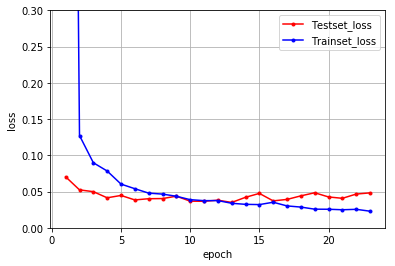

In [193]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0,0.3)
plt.show()


# 차원 연습

In [169]:
a = np.array([[[1, 2, 3], [4, 5, 6],[1, 2, 3], [4, 5, 6]],
              [[1, 2, 3], [4, 5, 6],[1, 2, 3], [4, 5, 6]],
             [[1, 2, 3], [4, 5, 6],[1, 2, 3], [4, 5, 6]],
             [[1, 2, 3], [4, 5, 6],[1, 2, 3], [4, 5, 6]],
             [[1, 2, 3], [4, 5, 6],[1, 2, 3], [4, 5, 6]]])

a = a.reshape(a.shape[0],4,3,1).astype('float32') / 255
a.shape

(5, 4, 3, 1)